<div style="direction:rtl;text-align:center"><img src="https://dl.mohammadkh.ir/logo.png" alt="Mohammadkh.ir" style="width: 250px;"/></div>
<h1><div style="direction:rtl;text-align:center">Neural Network</div></h1>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint

### Load Data and preprocess

In [69]:
image_generator = ImageDataGenerator(
    rescale=1./255.,
    shear_range=0.1,
    zoom_range=0.3,
)
image_generator_test = ImageDataGenerator(
    rescale=1./255.
)

train_data = image_generator.flow_from_directory(
    '../__data/X_RAY/train',
    target_size=(250, 250),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=5
)
test_data = image_generator_test.flow_from_directory(
    '../__data/X_RAY/test',
    target_size=(250, 250),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=2
)

Found 550 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


### Creat model and fit

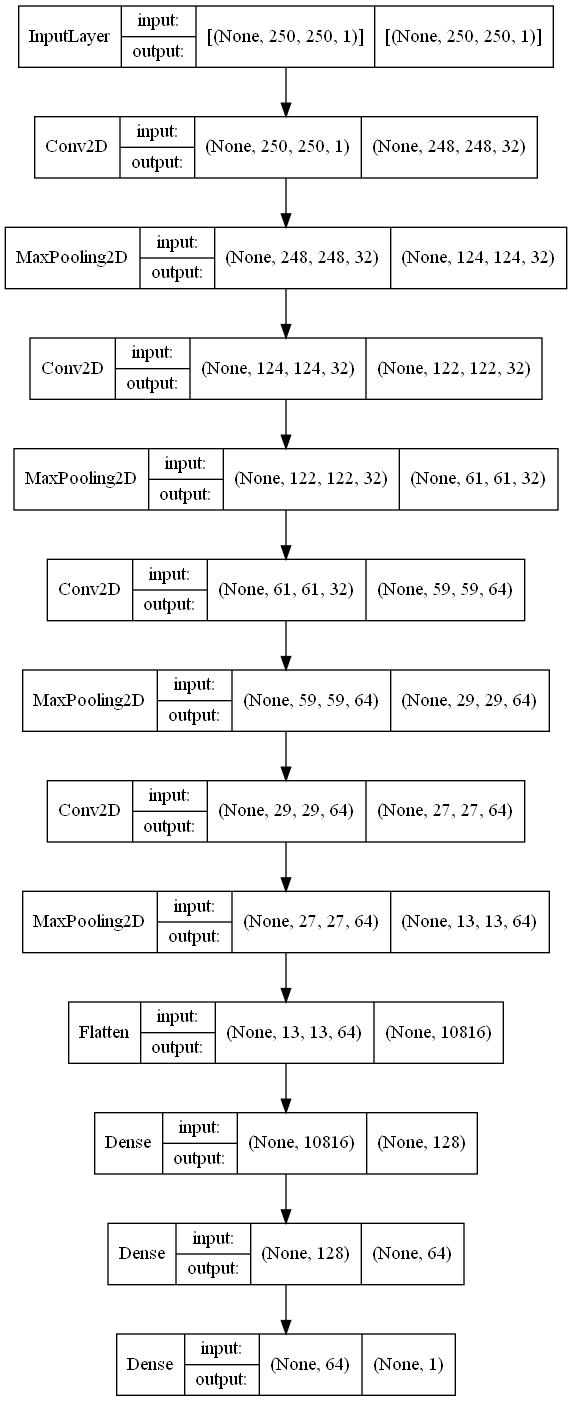

In [55]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

plot_model(model, show_shapes=True, show_layer_names=False)

#### class weights

In [56]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_data.classes), y=train_data.classes)
print(weights)
class_weights = dict(zip(np.unique(train_data.classes), weights))
class_weights

[1.39593909 0.77903683]


{0: 1.3959390862944163, 1: 0.7790368271954674}

In [65]:
es = EarlyStopping(monitor='accuracy', mode='auto', patience=5)
rlrop = ReduceLROnPlateau(monitor='accuracy', patience=3, factor=0.2, min_lr=0.001)
# mch = ModelCheckpoint('chestxray.h5', monitor='val_loss', mode='min', save_best_only=True)

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
history = model.fit_generator(train_data, steps_per_epoch=len(train_data), epochs=5, validation_data=test_data, validation_steps=len(test_data), callbacks=[es, rlrop], class_weight=class_weights)

Epoch 1/5


C:\Users\Mohammad KH\AppData\Local\Temp\ipykernel_14716\399207833.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, steps_per_epoch=len(train_data), epochs=5, validation_data=test_data, validation_steps=len(test_data), callbacks=[es, rlrop], class_weight=class_weights)


110/110 [==============================] - 13s 120ms/step - loss: 0.1436 - accuracy: 0.9364 - val_loss: 0.5109 - val_accuracy: 0.8243 - lr: 0.0010
Epoch 2/5
110/110 [==============================] - 13s 120ms/step - loss: 0.2009 - accuracy: 0.9291 - val_loss: 0.5150 - val_accuracy: 0.7838 - lr: 0.0010
Epoch 3/5
110/110 [==============================] - 13s 120ms/step - loss: 0.1148 - accuracy: 0.9436 - val_loss: 0.4206 - val_accuracy: 0.8514 - lr: 0.0010
Epoch 4/5
110/110 [==============================] - 13s 120ms/step - loss: 0.1245 - accuracy: 0.9527 - val_loss: 0.6565 - val_accuracy: 0.7973 - lr: 0.0010
Epoch 5/5
110/110 [==============================] - 13s 120ms/step - loss: 0.1240 - accuracy: 0.9527 - val_loss: 0.3890 - val_accuracy: 0.8784 - lr: 0.0010


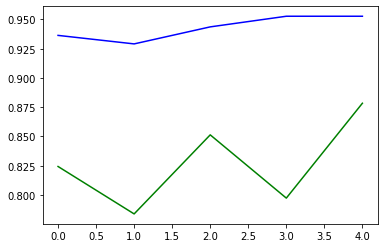

In [72]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='green')

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:left"><strong>Neural Network</strong><br>MohammadReza <strong>Khajedaloi</strong><br><br>
</div>
<div style="direction:rtl;text-align:right">
<a href="http://mohammadkh.ir/">WebSite</a> - <a href="https://github.com/khajedaloi/">GitHub</a> - <a href="https://www.linkedin.com/in/mohammad-kh/">Linkedin</a>
</div>
</div>